## Лабораторна робота №2.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
df = pd.read_csv('titanic.csv');

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки: Данный dataset состоит из 11 атрибутов(features) и одной target переменной "Survived".Размерность выборки 891 x 12. Два атрибута содержат в себе тип данных float, 5 атрибутов типа int и оставшиеся 5 атрибутов являются object(строкой). При анализе статистической информации по каждому атрибуту, выяснил что в среднем выжываемость на Titanic = 38% , возраст пассажира может принимает значения от 0,4 до 81.У многих пасажиров отсутствует показатель возраста, который в дальнейшем нужно будет заполнить.Также отсутвует много значений в атрибуте cabin отвечающего за номер кабины, и в атрибуте embarked отвечающего за информацию о порте посадки пассажира (2 пропуска).

***Завдання 3:*** Побудувати матрицю кореляції 

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти
3. Описати отримані результати, спираючись на значення коефіціентів кореляції

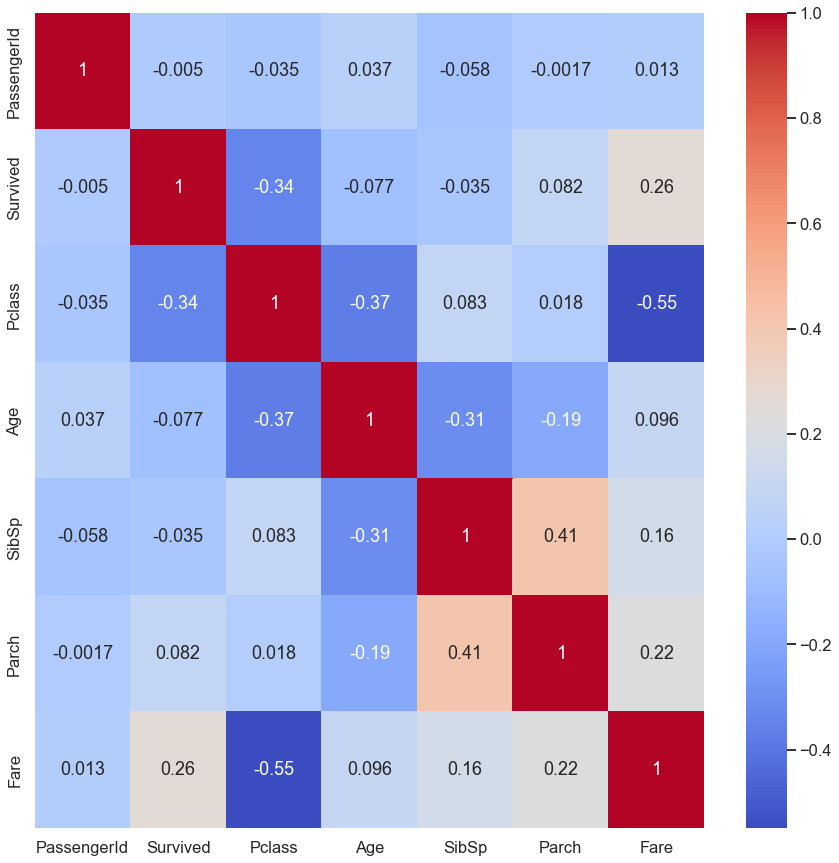

In [9]:
plt.figure(figsize = (15, 15));
sns.heatmap(df.corr(method='pearson'), annot = True, cmap="coolwarm");

In [10]:
df.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Ваші висновки: Для того чтобы выяснить есть ли линейная зависимость между атрибутами в данной выборке, была построина матрица корреляции и были рассчитаны коэффициенты корелляции с помощью метода Пирсона.Коэффициент корреляции изменяется в пределах от -1 до +1.Если коэффициент корелляции равен -1 то между двумя переменными существует линейно обратная взаимосвязь, если же коэффициент корелляции равен 1,то между двумя переменными существует полная линейная взаимосвязь.Значение коэффициента корелляции при 0 означает независимость двух переменных.В выборке Titanic в большинстве случаев между атрибутами коэффициент корелляции либо равен = 0 или стремиться к нему , что даёт понять что они независимы друг от друга.Но между атрибутами Age и Pclass и Pclass Fare коэффициента корелляции стремиться к -1, значит между этими  атрибутами есть линейно обратная взаимосвязь.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [11]:
df.groupby('Sex')['Age'].median() #среднее значение возраста относительно двух гендеров: male и female

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [12]:
df.groupby('Pclass')['Age'].median()#среднее значение возраста относительно класса(1,2,3)

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [13]:
df.groupby(['Pclass', 'Sex'])['Age'].median()# cреднее значение возраста относительно класса в котором находиться человек и его пол

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [14]:
df[['Sex', 'Pclass', 'Survived']].groupby(['Pclass','Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)
# средняя выживаемость людей относительно их гендера и класса

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [15]:
df.head(15)# вывел первый 15 человек чтобы найти человека с пропущенным значением в атрибуте возраст(5 пассажир)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
def fillAgeNanValues(dataset, column, groupByList):
    requiredValue = dataset.groupby(groupByList)[column].transform(lambda x: x.fillna(x.median()));
    dataset[column] = requiredValue;
    return  dataset[column];
    

fillAgeNanValues(df, 'Age', ['Pclass', 'Sex']);
    

In [17]:
df.isna().sum()# повторная проверка на наличие пустых значений 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df.loc[[5]]# у 5 пассажира был заменён возраст на медианное значение относительного его Sex(male) и Pclass(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q


Ваші висновки: Перед тем как писать функцию для заполнения пропусков в атрибуте 'Age', провёл анализ относительно значений среднего возраста людет по их гендеру и классу в который они входили на Титанике. Средний возраст мужчин во всех 3 классах был выше среднего возраста женщин.Функция fillAgeNanValues принимает в себя три параметра: датасет, колонку с пропущенными значениями, и список групирующих колонок.С помощью lambda function заполняем медианным значением все пропуски в необходимых местах, опираясь на возраст и группу в которой находиться человек.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





In [19]:
df['Age_bin'] = pd.cut(df['Age'].astype(int), 5, labels = [0 ,1, 2, 3, 4])

In [20]:
df.head()#новая колонка Age_bin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [21]:
plt.figure(figsize = (15, 15));
df.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.039033,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500
Age,0.039033,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692
SibSp,-0.057527,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000


<Figure size 1080x1080 with 0 Axes>

In [22]:
df.shape

(891, 13)

In [23]:
df.groupby(['Pclass', 'Sex'])['Age_bin'].value_counts()#количество людей  каждой вековой категории относительно их пола и Pclass

Pclass  Sex     Age_bin
1       female  2           39
                1           32
                3           17
                0            6
        male    2           60
                1           27
                3           26
                4            6
                0            3
2       female  1           39
                2           21
                0           10
                3            6
        male    1           58
                2           26
                0           11
                3           11
                4            2
3       female  1           94
                0           33
                2           16
                3            1
        male    1          245
                2           54
                0           37
                3            8
                4            3
Name: Age_bin, dtype: int64

Text(0.5, 0.9, 'Quantity of survived people ')

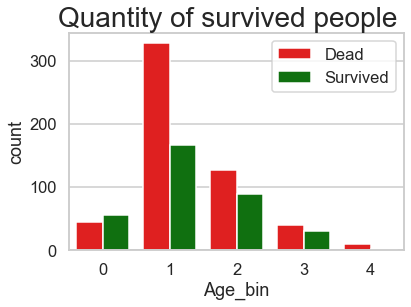

In [24]:
plot = sns.countplot(data = df, hue = df['Survived'], x = df['Age_bin'], palette = ['Red', 'Green'])
plot.legend(labels = ['Dead','Survived'])
plt.figtext(.5,.9,'Quantity of survived people ', fontsize = 28, ha ='center')

Ваші висновки:В датафрейм добавил новую колонку 'Age_bin', разбив её на 5 ячеек(типа int), используя метод cut.Построив график, можно заметить что люди в более молодом возрасте относящиеся к 0 группе(возраст меньше 16 лет) выживали чаще нежели погибали.Люди 1 группы(возраст от 16 - 32 лет), как видно на графике визуально погибали в 2 раза чаще, нежели выживали.Группы 2(возраст от 32 - 48) и 3(возраст от 48 - 64) уровень выживаемости почти равен уровни смертности.Из группы 4(возраст от 64 - 81)никто не выжил.Смерть либо выживаемость человека зависит напрямую от его пола и Pclass.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [26]:
df['Fare_Additional'] = pd.qcut(df['Fare'], 5, labels=['0', '1', '2', '3', '4'])

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_Additional
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1


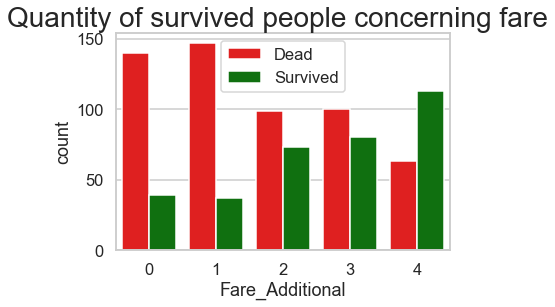

In [28]:
plot = sns.countplot(data = df, hue = df['Survived'], x = df['Fare_Additional'], palette = ['Red', 'Green']);
plt.figtext(.5,.9,'Quantity of survived people concerning fare', fontsize = 28, ha = 'center')
plot.legend(labels = ['Dead','Survived']);

Ваші висновки:Атрибут Fare, который отвечал за пассажирский тариф был переведен в порядковую шкалу.Исходя из графика чем выше пасажирский тариф, тем выше выживаемость человека.То есть люди относящиеся к более высокому Pclass, выживали за счёт того что отдавали больше денежных средств для оплаты пассажирского тарифа, нежели люди которые были из Pclass(0, 1).Следует что гипотеза поставленная в условии истинная.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [29]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1;

In [30]:
df['Family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_Additional,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,4,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,4,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1,1


In [32]:
def fillAloneValues(dataset, column, newColumn):
    lambdaFunction = lambda x: 1 if x == 0 else 0;
    requiredValue = dataset[column].map(lambdaFunction);
    dataset[newColumn] = requiredValue;
    return dataset[newColumn];
fillAloneValues(df, 'Family_size', 'Alone');

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_Additional,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,4,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,4,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1,1,0


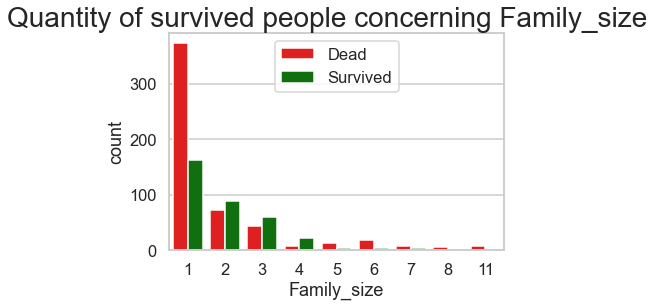

In [34]:
plot = sns.countplot(x = df['Family_size'], data = df, hue = df['Survived'],  palette = ['Red', 'Green']);
plt.figtext(.5,.9,'Quantity of survived people concerning Family_size ', fontsize = 28, ha = 'center');
plot.legend(labels = ['Dead','Survived']);

Ваші висновки:В выборку добавил два новых атрибута Family_size и Alone. Family_size отвечал за размер семьи определеного человека, атрибут Alone показывал есть ли у человека семья либо он одинок.Написал функцию для того чтобы заполнить значениями атрибут Alone. Анализируя полученный график люди у которых не было родственников умирали чаще нежели выживали, напротив у людей у которых были роственники в диапозоне от 1 - 3 людей выживали чаще.Более большие семьи погибали.  

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [35]:
df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Age_bin              0
Fare_Additional      0
Family_size          0
Alone                0
dtype: int64

In [36]:
df['Cabin'].duplicated().sum()

743

In [37]:
dropColumns = ['PassengerId', 'Ticket', 'Cabin', 'SibSp', 'Parch']
df.drop(dropColumns, axis=1, inplace=True)

In [38]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_bin,Fare_Additional,Family_size,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,4,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,4,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,2,1,1,0


Ваші висновки: Удалил в первую очередь атрибут Cabin из-за того что данный атрибут содержал много пропусков которые невозвожно было заменить. Атрибуты  'SibSp', 'Parch' также были удалены из-за того что в перведущем задание мы добавили атрибут Family_size которой состоит из этих атрибутов. Атрибут Ticket не содержит в себе нужную информацию для дальйнешего анализа , поэтому тоже был удалён.PassengerId лишь идентификатор для человека, его значения никак не помогут для построения будующей модели.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [39]:
def createCategoricalValues(dataset, column, replaceDict):
    dataset[column] = dataset[column].replace(replaceDict)
    return dataset[column]
    

dictForSex = {'male': 0 , 'female': 1};
dictForEmbarked = {'S' : 0, 'Q': 1, 'C': 2}; 


createCategoricalValues(df, 'Sex', dictForSex)
createCategoricalValues(df, 'Embarked', dictForEmbarked)

0      0.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    2.0
890    1.0
Name: Embarked, Length: 891, dtype: float64

In [40]:
df.isna().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
Fare               0
Embarked           2
Age_bin            0
Fare_Additional    0
Family_size        0
Alone              0
dtype: int64

In [41]:
df['Embarked'].mode()# модой в данном атрибуте являеться порт S, он до этого был заменён 0

0    0.0
dtype: float64

In [42]:
df['Embarked'] = df['Embarked'].fillna(0)

In [43]:
df.isna().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
Fare               0
Embarked           0
Age_bin            0
Fare_Additional    0
Family_size        0
Alone              0
dtype: int64

In [44]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_bin,Fare_Additional,Family_size,Alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0.0,1,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,2.0,2,4,2,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0.0,1,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0.0,2,4,2,0
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0.0,2,1,1,0


In [45]:
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(1, df['Title'])# с помощью регулярного выражения находим все возможные абривиатуры для имён

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
row_0,,,,,,,,,,,,,,,,,
1,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1


In [46]:
stringArray = ['Capt', 'Col', 'Countess', 'Don', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir']
df[df['Name'].str.contains("Sir")]

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_bin,Fare_Additional,Family_size,Alone,Title
60,0,3,"Sirayanian, Mr. Orsen",0,22.0,7.2292,2.0,1,0,1,0,Mr
599,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,49.0,56.9292,2.0,3,4,2,0,Sir
837,0,3,"Sirota, Mr. Maurice",0,25.0,8.0500,0.0,1,1,1,0,Mr


In [47]:
def replaceNameValue(dataset, column, replaceDict):
    return dataset[column].replace(replaceDict)

nameDict = {'Don' : 0 , 'Mr' : 0, 'Capt' : 0, 'Col' : 0, 'Countess' : 1, 'Dr' : 0, 'Jonkheer' : 0, 'Lady' : 1,
            'Major' : 0, 'Master' : 0, 'Miss' : 1, 'Mlle' : 1, 'Mr' : 0,
            'Mrs' : 1, 'Ms': 1 , 'Rev' : 0, 'Sir' : 0}

df['Title'] = replaceNameValue(df, 'Title', nameDict)

In [48]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_bin,Fare_Additional,Family_size,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0.0,1,0,2,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,2.0,2,4,2,0,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0.0,1,1,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0.0,2,4,2,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0.0,2,1,1,0,0


In [49]:
df.drop('Name', axis = 1, inplace = True)

In [50]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_bin,Fare_Additional,Family_size,Alone,Title
0,0,3,0,22.0,7.2500,0.0,1,0,2,0,0
1,1,1,1,38.0,71.2833,2.0,2,4,2,0,1
2,1,3,1,26.0,7.9250,0.0,1,1,1,0,1
3,1,1,1,35.0,53.1000,0.0,2,4,2,0,1
4,0,3,0,35.0,8.0500,0.0,2,1,1,0,0


Ваші висновки: Три атрибута Sex, Embarked и Title были переведенны в числовые шкалы.Значения атрибута Sex(male,female) были заменены на 0 и 1.Значения атрибута Embarked отвечающего за информацию о порте посадки пассажира, были переведенны в числа от 1 до 3.С атрибутом title не всё так было однозначно, но написав регуляное выражение для поиска различных абривиатур которые приписывались к именам пассажиров, выяснил что наиболее популярные приставки Mr и Mss.Написал функцию для создания атрибута Title при этом внося для каждого пассажира нужную цыфру в зависимости от его пола.Потом удалил атрибут name, потому что он был строковым и не нёс в себе необходимой информации.Также поработал над пропусками в атрибуте Embarked.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості споcтережень по кожній категорії



In [51]:
df['Sex'].unique()

array([0, 1], dtype=int64)

In [52]:
df['Embarked'].unique()

array([0., 2., 1.])

In [53]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


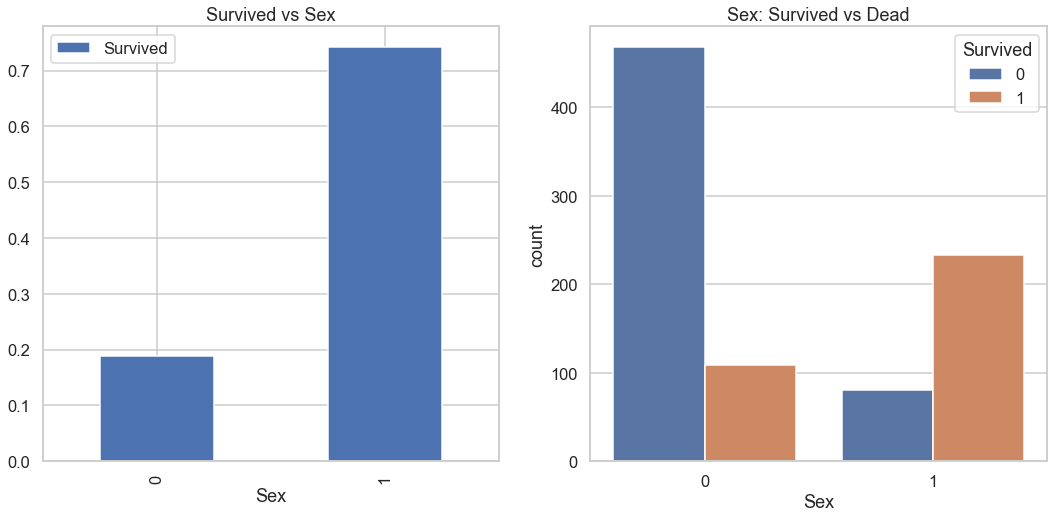

In [54]:
df.groupby(['Sex','Survived'])['Survived'].count()
f,ax = plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue = 'Survived', data = df)
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


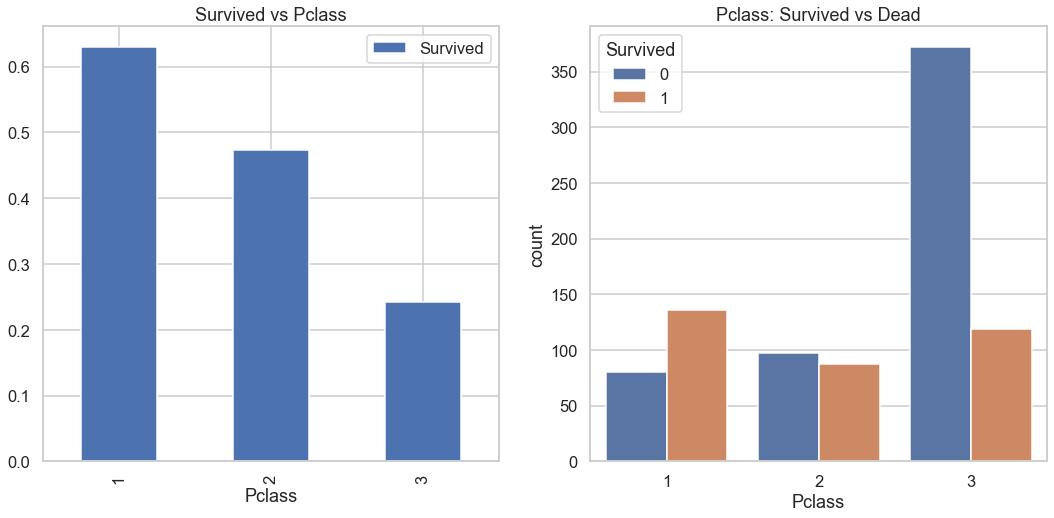

In [55]:
df.groupby(['Pclass','Survived'])['Survived'].count()
f,ax = plt.subplots(1,2,figsize=(18,8))
df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Pclass')
sns.countplot('Pclass',hue = 'Survived', data = df)
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


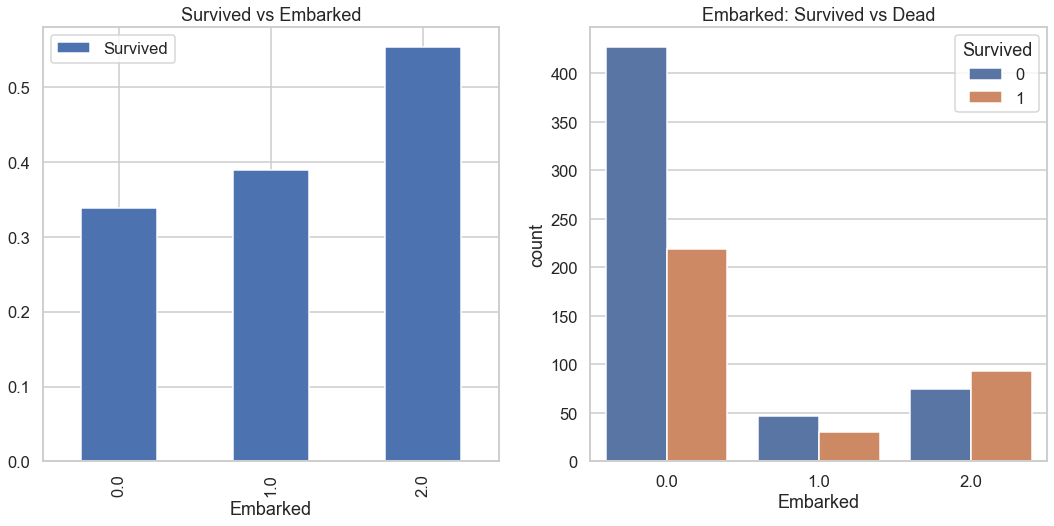

In [56]:
df.groupby(['Embarked','Survived'])['Survived'].count()
f,ax = plt.subplots(1,2,figsize=(18,8))
df[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Embarked')
sns.countplot('Embarked',hue = 'Survived', data = df)
ax[1].set_title('Embarked: Survived vs Dead')
plt.show()

Ваші висновки: Были найдены категориальные переменные, то есть переменные которые можно распределить на определенныи группы.Target атрибут Survived принимает значение 0 либо 1, атрибут Sex 0-1, атрибут Embarked 1-3, Pclass 1-3.На первом графике видно что средняя выживаемость мужчин в разы меньше чем у женщин и они выживали в большинстве случаев, нежели умирали.На втором графике как и следовало ожидать люди находящиеся в Pclass(1) уровень выживаемости выше смертности, в Pclass(2) уровень выживаемости чуть меньше уровня смертности, ну и очевидно что в Pclass(3) больше всего смертей.Самой основной причной почему люди в некотором классе выживали , а в других классах умирали, являеться расположение этих людей на разных уровнях самого Титаника. 

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

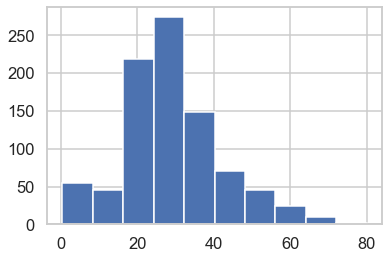

In [58]:
age = df['Age'].hist()
fig = age.get_figure()

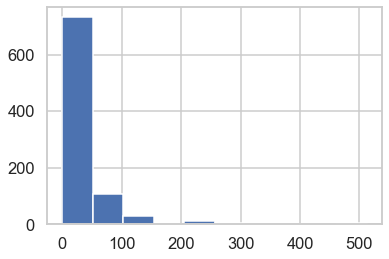

In [60]:
fare = df['Fare'].hist()
fig = fare.get_figure()

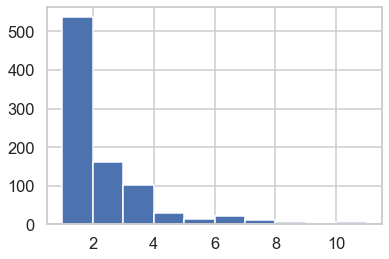

In [62]:
familySize = df['Family_size'].hist()
fig = familySize.get_figure()

Ваші висновки: Проанализировав полученные гистограммы можно сделать небольшие выводы , а именно :
<li>На Титинике больше всего людей среднего возраста</li>
<li>Довольно огромное количество детей возрастом меньше 10 лет</li>
<li>В основном приобритались билеты для Pclass(3) из-за своей низкой цены</li>

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

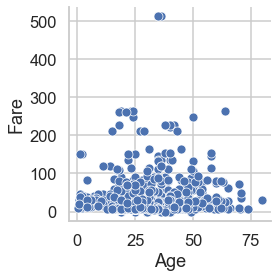

In [72]:
sns.pairplot(df, x_vars = ['Age'], y_vars = ['Fare'], height = 4)

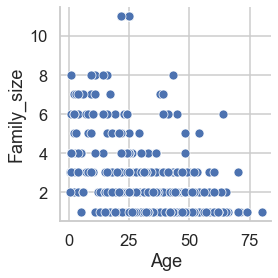

In [75]:
sns.pairplot(df, x_vars = ['Age'], y_vars = ['Family_size'], height = 4)

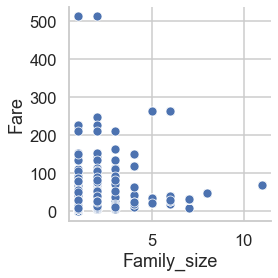

In [77]:
sns.pairplot(df, x_vars = ['Family_size'], y_vars = ['Fare'], height = 4)

Ваші висновки: Люди которые одинокие более платежёспособные и поэтому находились в Pclass(1), люди с семьями выбирали дешёвые билеты и находились в Pclass(3).У людей приклонового возраста меньше всего родственников в некоторых случаях их просто нет.Люди в среднем возрасте являються самыми богатыми.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.